In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 3.1, 4.5, 6.2, 7.9])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

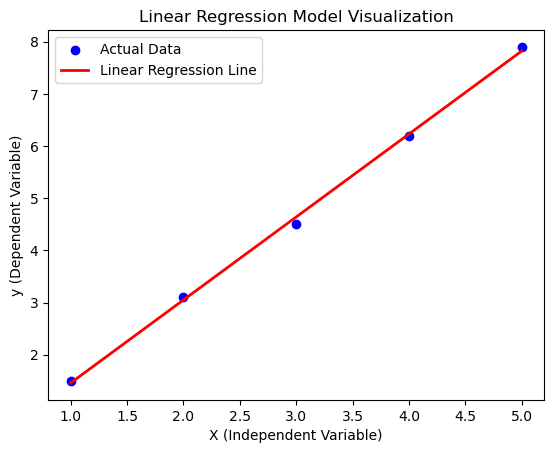

In [2]:
import matplotlib.pyplot as plt

# 1. Predict values for your training data
y_pred = model.predict(X)

# 2. Plot the original data points
plt.scatter(X, y, color='blue', label='Actual Data')

# 3. Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')

# 4. Add labels and title
plt.title('Linear Regression Model Visualization')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()